In [98]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import kstest, poisson
import statsmodels.api as sm
import seaborn as sns

path = os.path.abspath(os.path.dirname(os.getcwd())) + '\\data'

In [2]:
info_article = pd.read_csv(path+'\\info\\info_article_o_8_n.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_9.csv')
info_year = pd.read_csv(path+'\\info\\info_year_o_9_m.csv')

In [4]:
def describe_crossref(info_article):
    
    crossref = info_article['Crossref']
    
    mean = crossref.mean()
    std = crossref.std()
    
    x_axis_value = info_issue['period'].values
    
    x = info_article['period'].values
    y = info_article['Crossref'].values
    
    fig = plt.figure(figsize = (12,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Crossref', fontsize=10)
    
    # ax.set_xlim('1999-01-01','2021-01-01')
    ax.set_ylim(-10,400)
    ax.set_xticks(range(0,len(x_axis_value),10))
    # ax.set_xticklabels() 
    
    ax.hlines(mean+3*std, xmin=0, xmax=1,
              linestyle='--', linewidth=0.75, alpha=0.55, color='#e377c2')
    
    ax.hlines(mean-3*std, xmin=0, xmax=1,
              linestyle='--', linewidth=0.75, alpha=0.55, color='#e377c2')
    
    ax.fill_between([0,len(x_axis_value)-1],
                    0, mean+3*std,
                    alpha=0.3, color='#7f7f7f')
    
    ax.fill_between([0,len(x_axis_value)-1],
                    0, mean+2*std,
                    alpha=0.3, color='#7f7f7f')
    
    ax.fill_between([0,len(x_axis_value)-1],
                    0, mean+std,
                    alpha=0.3, color='#7f7f7f')
    
    ax.text(0, 330, 
            r'$\mu = $'+str(format(mean,'.4f'))+'\n'+
            r'$\sigma = $'+str(format(std,'.4f')))
    
    
    ax.scatter(x, y, marker='o',s=9,
               facecolors='none',edgecolors='black')

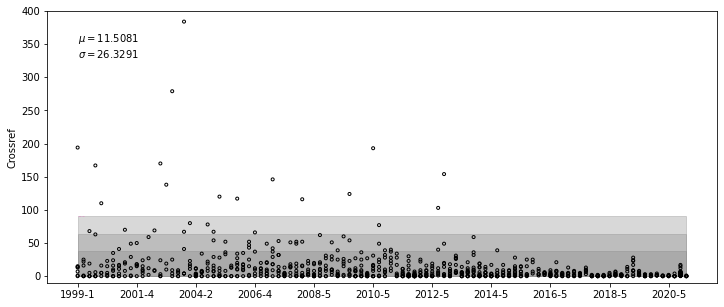

In [5]:
describe_crossref(info_article)

In [115]:
mean = info_article['Crossref'].mean()
std = info_article['Crossref'].std()

article_all = info_article

article_high = info_article[info_article['Crossref'] > 100]
# article_high = info_article[info_article['Crossref'] > mean+3*std]
# mean+3*std = 90.495
article_high = article_high.reset_index(drop=True)

article_normal = info_article[info_article['Crossref'] <= 100]
article_normal = article_normal.reset_index(drop=True)

In [5]:
article_high.head()

number_volume number_issue  number_article  year  period type_decide  \
0              1            1               5  1999  1999-1     article   
1              2            1               3  2000  2000-1     article   
2              2            2               1  2000  2000-2     article   
3              4            4               1  2002  2002-4     article   
4              5            1               1  2003  2003-1     article   

    type_1             type_2  \
0  Article  Original Articles   
1  Article  Original Articles   
2  Article  Original Articles   
3  Article  Original Articles   
4  Article  Original Articles   

                                           name_book  \
0  private and public transfers between generatio...   
1                     vocational secondary education   
2             the battlegrounds of european identity   
3                    gender and welfare state change   
4  unemployment, poverty and social isolation: is...   

                                     name_book_words  ...  \
0  ['private', 'public', 'transfer', 'generation'...  ...   
1           ['vocational', 'secondary', 'education']  ...   
2           ['battleground', 'european', 'identity']  ...   
3           ['gender', 'welfare', 'state', 'change']  ...   
4  ['unemployment', 'poverty', 'social', 'isolati...  ...   

   judge_mutiple_country_article page_start  page_end page_quant date_receive  \
0                              0         81       104         24          NaN   
1                              0         29        50         22          NaN   
2                              0        113       137         25          NaN   
3                              0        331       357         27          NaN   
4                              1          1        32         32          NaN   

   date_accept  date_online  views Crossref  Web_of_Science  
0          NaN  21 Oct 2013    371      194               0  
1          NaN  02 Dec 2010  2,194      167               3  
2          NaN  02 Dec 2010  3,231      110               0  
3          NaN  02 Dec 2010  4,246      170               0  
4          NaN  09 Dec 2010  4,168      138              10  

[5 rows x 26 columns]

In [6]:
print('number of highly cited articles :',len(article_high.index))
print('number of all the articles:', len(article_all.index))
print('percentage:', round((len(article_high.index)/len(article_all.index))*100, 2), '%')

number of highly cited articles : 15
number of all the articles: 864
percentage: 1.74 %


table:
1    6
2    4
3    2
4    2
5    1
dtype: int64


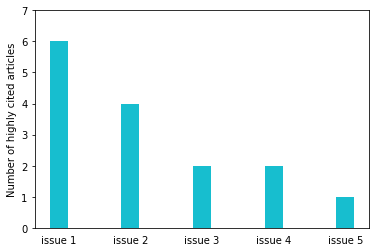

In [63]:
number_issue = pd.value_counts(list(article_high['number_issue']))
print('table:')
print(number_issue)

ind = np.arange(5)
width = 0.25
issue_name = ['issue '+str(x) for x in range(1,6)]

p = plt.bar(ind,list(number_issue), width, color='#17becf')

plt.xticks(ind, issue_name)
plt.ylabel('Number of highly cited articles')
plt.ylim(0,7)
plt.tick_params(bottom=False, top=False, left=True, right=False)
plt.show()

table:
    year  count
0   1999    1.0
1   2000    2.0
2   2001    0.0
3   2002    1.0
4   2003    3.0
5   2004    0.0
6   2005    1.0
7   2006    1.0
8   2007    1.0
9   2008    1.0
10  2009    0.0
11  2010    2.0
12  2011    0.0
13  2012    0.0
14  2013    2.0
15  2014    0.0
16  2015    0.0


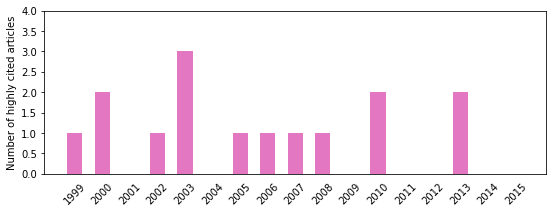

In [70]:
year_count = pd.value_counts(list(article_high['year']))

year_count = year_count.reset_index(name='count')
year_count.rename(columns={'index':'year'},inplace=True)

year_count = pd.merge(pd.DataFrame(range(1999,2016),columns=['year']),
                      year_count, on='year', how='outer')
year_count = year_count.fillna(0)

print('table:')
print(year_count)

ind = np.arange(17)
width = 0.55

plt.figure(figsize=(9,3))

p = plt.bar(ind, list(year_count['count']), width, color='#e377c2')

plt.xticks(ind, list(year_count['year']))
plt.xticks(rotation=45)
plt.ylabel('Number of highly cited articles')
plt.ylim(0,4)
plt.tick_params(bottom=False, top=False, left=True, right=False)

plt.show()

d:\10_python\python-3.8.2\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\10_python\python-3.8.2\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
d:\10_python\python-3.8.2\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

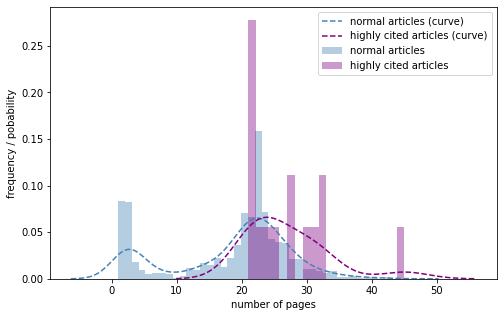

In [126]:
x1 = article_normal['page_quant']
x2 = article_high['page_quant']

plt.subplots(figsize=(8, 5))
sns.distplot(x1, bins = 40, kde = False, hist_kws = {'color':'steelblue'},
             label = 'normal articles', norm_hist=True)
sns.distplot(x2, bins = 20, kde = False, hist_kws = {'color':'purple'},
             label = 'highly cited articles',norm_hist=True)
sns.distplot(x1, hist = False, kde_kws = {'color':'steelblue', 'linestyle':'--'},
             norm_hist = True, label = 'normal articles (curve)')
sns.distplot(x2, hist = False, kde_kws = {'color':'purple', 'linestyle':'--'},
             norm_hist = True, label = 'highly cited articles (curve)')

plt.xlabel('number of pages')
plt.ylabel('frequency / pobability')
plt.legend()
plt.show()

In [131]:
# isn't concerned with number of authors
# isn't conserned if they come from multiple countries

In [134]:
article_high.to_csv(path+'\\info\\info_article_high.csv',index=False,sep=',')